# ヒープソート

In [13]:
# display graph on notebook
%matplotlib inline
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
import random
import time

In [14]:
from graphviz import Digraph

class Heap:
    def __init__(self, array=[]):
        self.data = []
        for v in array:
            self.add(v)

    def add(self, v):
        i = len(self.data)
        self.data.append(v)
        i_parent = int((i-1)/2)
        while i > 0 and self.data[i] < self.data[i_parent]:
            self.data[i], self.data[i_parent] = self.data[i_parent], self.data[i]
            i, i_parent = i_parent, int((i_parent-1)/2)

    def pop(self):
        i_last = len(self.data) - 1
        self.data[0], self.data[i_last] = self.data[i_last], self.data[0]
        value = self.data.pop(i_last)
        i_parent = 0
        i_left = i_parent * 2 + 1
        i_right = i_left + 1
        while i_left < i_last:
            v_left = self.data[i_left]
            if i_right < i_last:
                v_right = self.data[i_right]
                i_small, v_small = (i_left, v_left) if v_left < v_right else (i_right, v_right)
            else:
                i_small, v_small = i_left, v_left

            if v_small < self.data[i_parent]:
                self.data[i_small], self.data[i_parent] = self.data[i_parent], self.data[i_small]
                i_parent = i_small
                i_left = i_parent * 2 + 1
                i_right = i_left + 1
            else:
                break
        return value
    
    def draw_graph(self):
        dot = Digraph()
        dot.attr('node', shape='circle')
        for i in range(len(self.data)):
            dot.node(str(i), str(self.data[i]))
            if i > 0:
                i_parent = int((i-1)/2)
                dot.edge(str(i_parent), str(i))
        return dot

def heap_sort(array):
    heap = Heap(array)
    result = []
    while len(heap.data) > 0:
        result.append(heap.pop())
    return result

In [15]:
h = Heap(['F', 'A', 'J', 'I', 'E', 'B', 'G', 'H', 'D'])
h.data

['A', 'D', 'B', 'E', 'F', 'J', 'G', 'I', 'H']

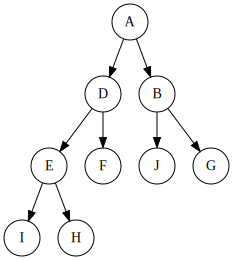

In [16]:
h.draw_graph()

A


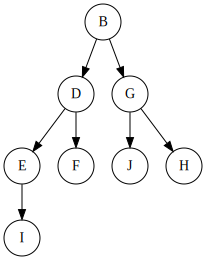

In [17]:
print(h.pop())
h.draw_graph()

B


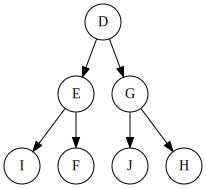

In [18]:
print(h.pop())
h.draw_graph()

In [20]:
heap_sort(['F', 'A', 'J', 'I', 'E', 'B', 'G', 'H', 'D'])

['A', 'B', 'D', 'E', 'F', 'G', 'H', 'I', 'J']

In [24]:
n_list = []
t_list = []
sorted_before = []
sorted_after = []
for n in [int(math.pow(2, i)) for i in range(7, 19+1)]:
    arr = [random.random() for i in range(n)]
    
    b = True
    for i in range(len(arr)-1):
        b = b and arr[i] < arr[i+1]
    sorted_before.append(b)
    
    start = time.time()
    arr = heap_sort(arr)
    end = time.time()
    n_list.append(n)
    t_list.append(round(end-start, 6))
    
    b = True
    for i in range(len(arr)-1):
        b = b and arr[i] < arr[i+1]
    sorted_after.append(b)

pd.DataFrame(data=np.array([n_list, t_list, sorted_before, sorted_after]).T, columns=['array length', 'sort time [s]', 'sorted (before)', 'sorted (after)'])

,array length,sort time [s],sorted (before),sorted (after)
0,128.0,0.002445,0.0,1.0
1,256.0,0.003320,0.0,1.0
2,512.0,0.006147,0.0,1.0
3,1024.0,0.013882,0.0,1.0
4,2048.0,0.033230,0.0,1.0
5,4096.0,0.066447,0.0,1.0
6,8192.0,0.161327,0.0,1.0
7,16384.0,0.312723,0.0,1.0
8,32768.0,0.602656,0.0,1.0
9,65536.0,1.828166,0.0,1.0


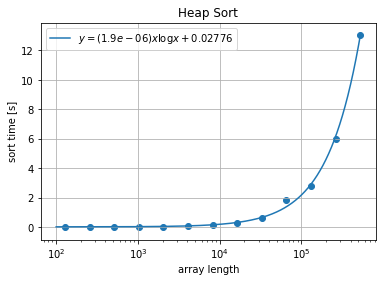

,a
0,0.000002
1,0.027760


In [25]:
from scipy.optimize import curve_fit
def func_fit(x, a, b):
    return a * x * np.log(x) + b

param, cov = curve_fit(func_fit, n_list, t_list)
x = np.array([i*100 for i in range(1, int(max(n_list)/100)+10)])
y = func_fit(x, param[0], param[1])

plt.title('Heap Sort')
plt.xlabel('array length')
plt.ylabel('sort time [s]')
plt.plot(x, y, label='$y = ({})x \log{{x}} + {}$'.format(round(param[0], 7), round(param[1], 6)))
plt.scatter(n_list, t_list)
plt.grid()
plt.xscale('log')
plt.legend()
plt.show()

pd.DataFrame(data=param, columns=['a'])